# Logistic Regression on Halloween candies
__Data tricks and treats__

`Logistic regression:` Predict if a candy is chocolate or not based on its other features?  
Guess: chocalate, sugar  
results:   
`Logistic Regression:` using the 'Winpercent' as the target

### 1. Data importing and preprocessing

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('./candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [23]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


categorical data: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus	  
numerical data: sugarpercent, pricepercent, winpercent  
since all the features are in good range which is between 0 - 1 (except the target), there is no need to do feature normalization

`Explanation about the data:`  
chocolate: Does it contain chocolate?  
fruity: Is it fruit flavored?  
caramel: Is there caramel in the candy?  
peanutalmondy: Does it contain peanuts, peanut butter or almonds?  
nougat: Does it contain nougat?  
crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?  
hard: Is it a hard candy?  
bar: Is it a candy bar?  
pluribus: Is it one of many candies in a bag or box?  
sugarpercent: The percentile of sugar it falls under within the data set.  
pricepercent: The unit price percentile compared to the rest of the set.  
winpercent: The overall win percentage according to 269,000 matchups.  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
categorical_data = df[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']]
numerical_data = df[['sugarpercent','pricepercent','winpercent']]

In [5]:
#Competitorname is no use for the analysis
#df.drop('competitorname', axis=1, inplace=True)

### 2. Data visualization

Text(0.5, 1.0, 'Ranking (winpercent normalized)')

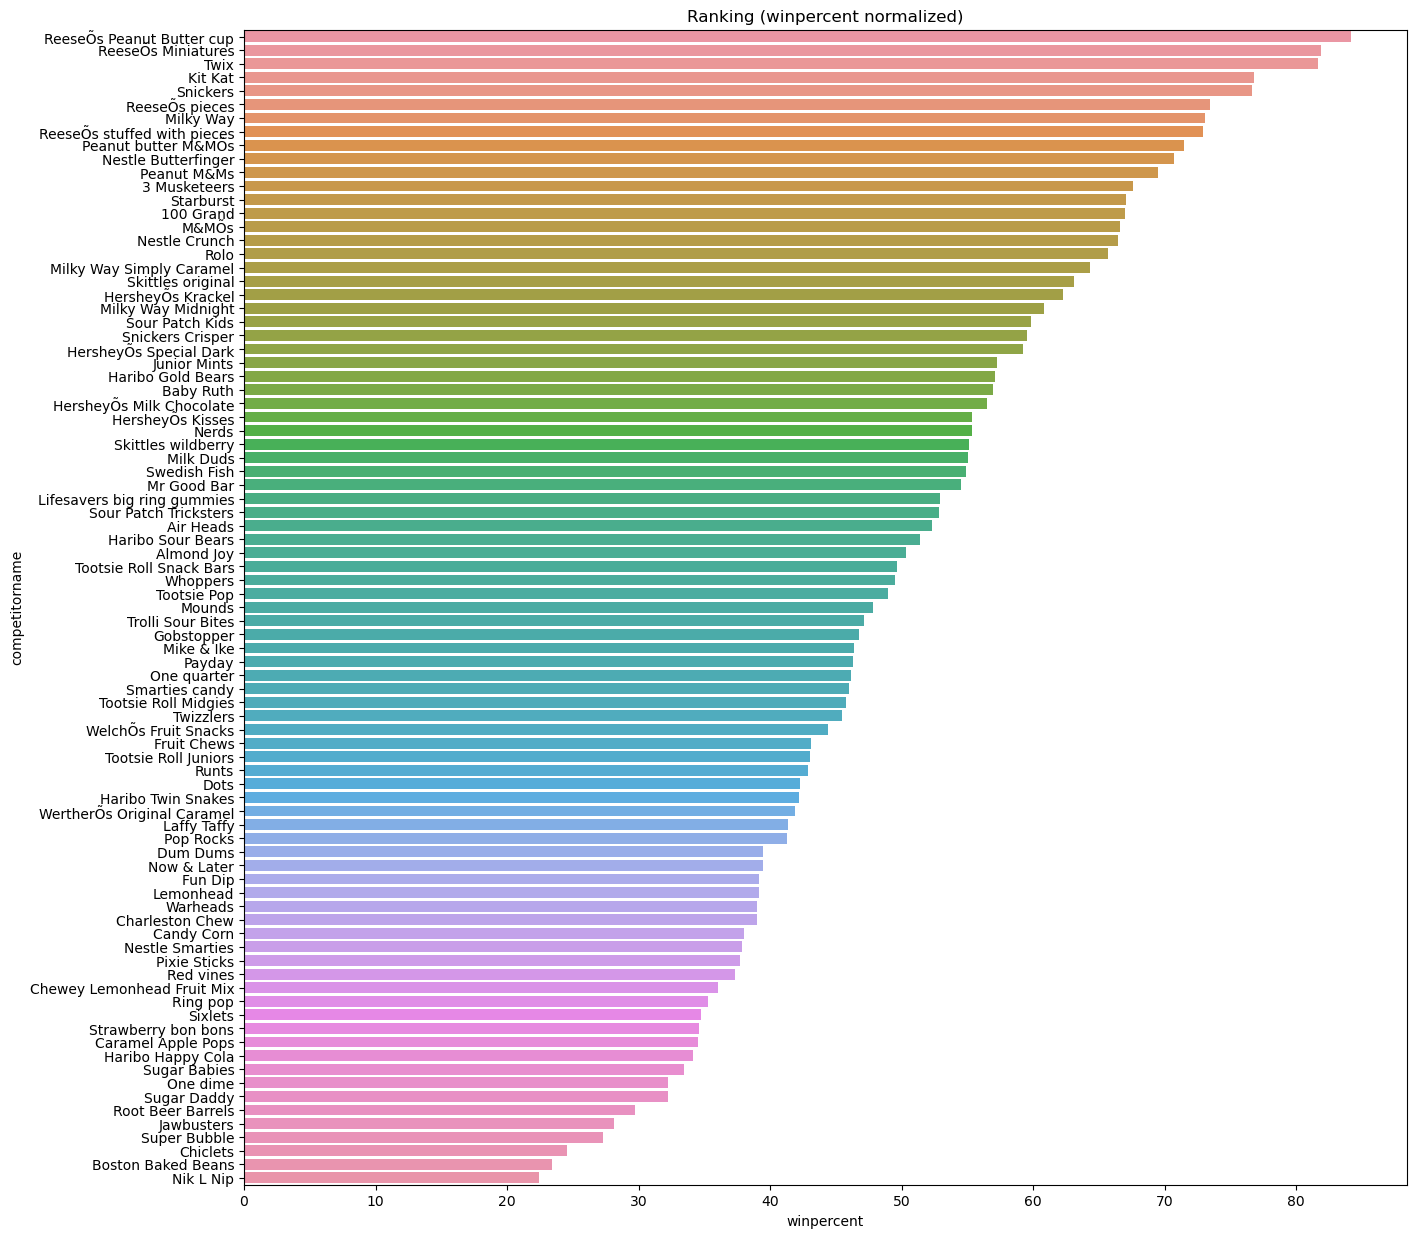

In [6]:
# The percentage of winning ordered
df_s = df.sort_values(by="winpercent", ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(y=df_s["competitorname"], x=df_s["winpercent"])
plt.title('Ranking (winpercent normalized)')

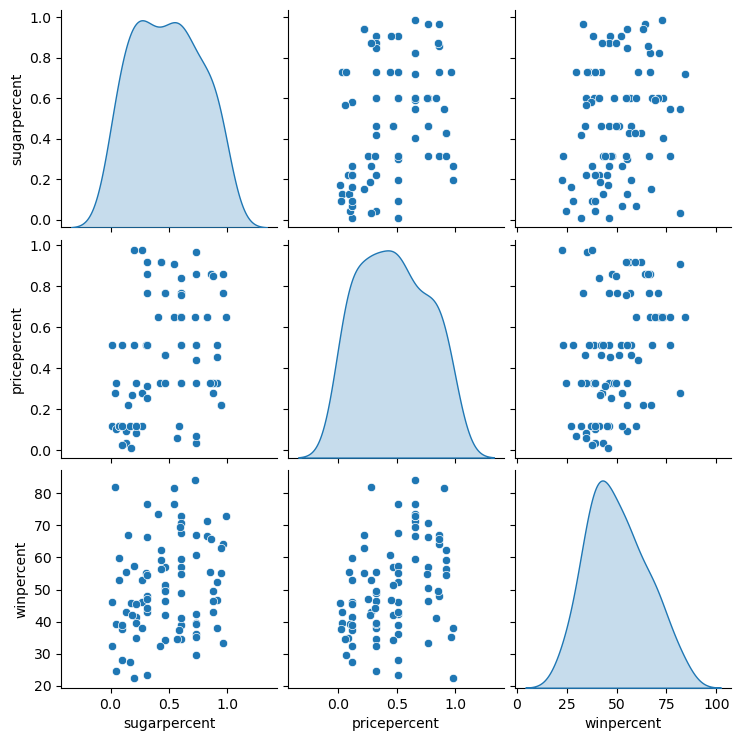

In [7]:
# Check the distribution of numerical values
sns.pairplot(data= numerical_data, diag_kind='kde')
# Normal distribution, nothing contained.

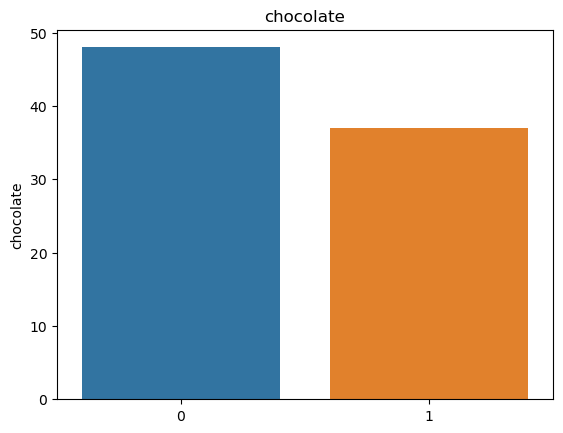

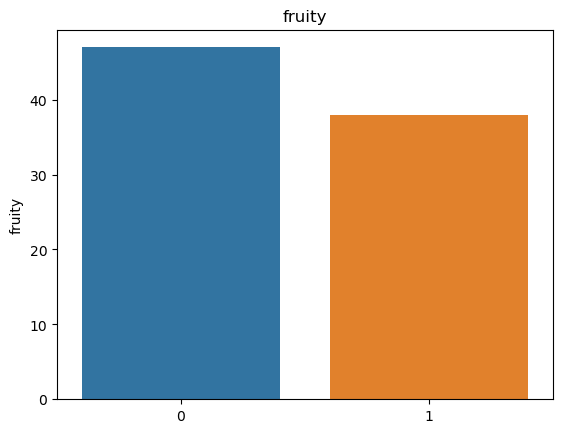

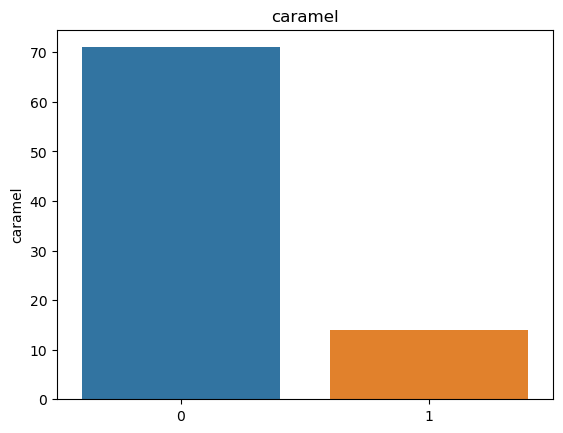

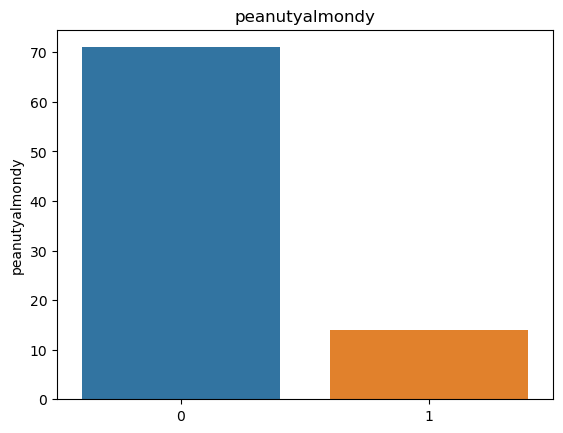

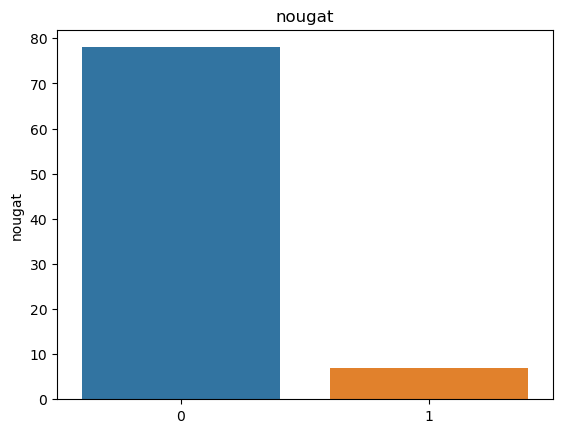

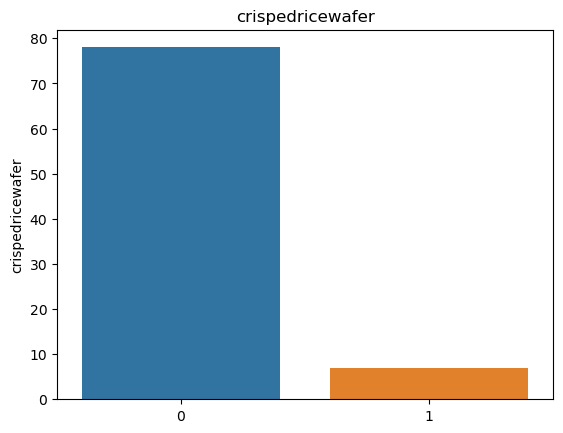

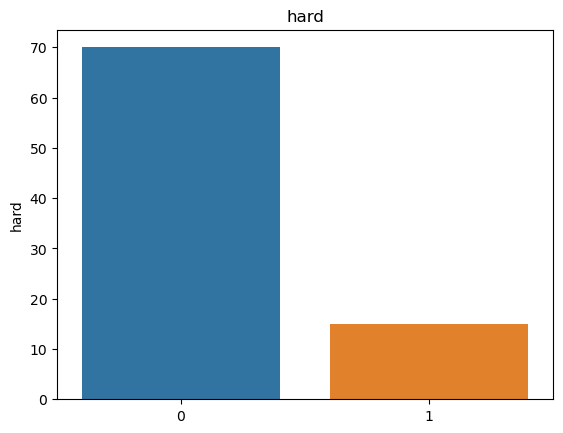

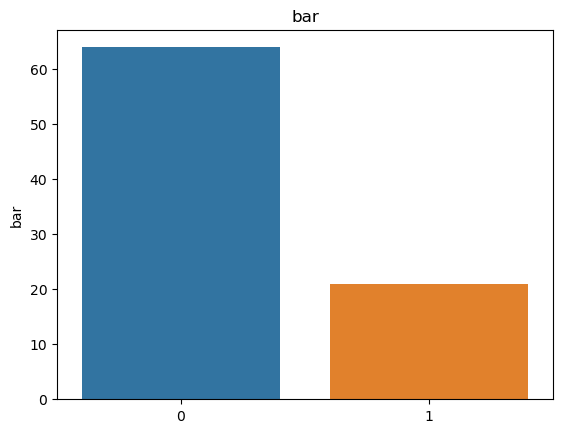

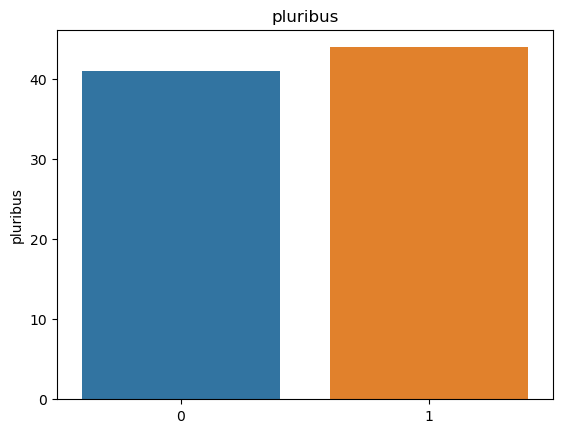

In [8]:
#check the distribution on the categorical feature

for i in categorical_data.columns:
    sns.barplot(x = categorical_data[i].value_counts().index, y = categorical_data[i].value_counts()).set_title(i)
    plt.show()

C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_32948\2729689418.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heat = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap="YlGnBu")


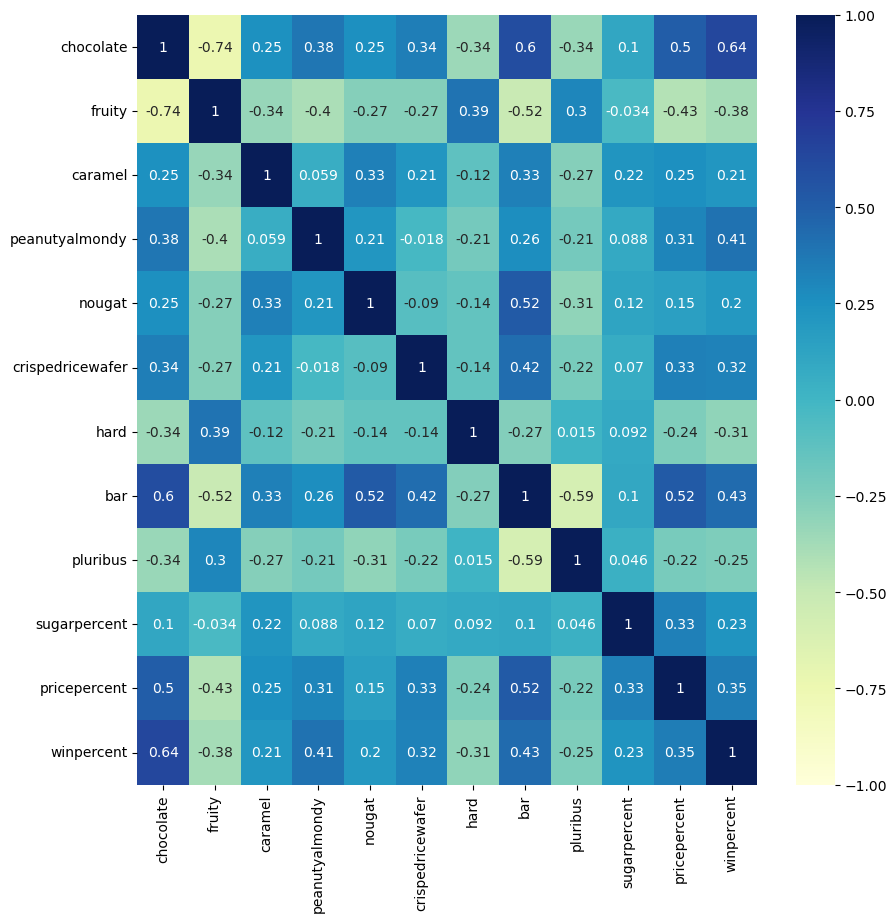

In [9]:
#Check the correlations with all the dataset.
X = df.copy()
X.drop('competitorname', axis=1, inplace=True)
plt.figure(figsize=(10, 10)) # set figure size
corr_heat = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap="YlGnBu")

-- Which qualities are associated with higher rankings?  
The correlation matrix to explore the data was presented. We can focus on the correlation between win percentage and other features

In [10]:
# focusin on the correlations with winpercent 
X.corr()["winpercent"]
wp_corr = X.corr()["winpercent"]

wp_corr.sort_values(ascending=False)

winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
pricepercent        0.345325
crispedricewafer    0.324680
sugarpercent        0.229151
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64

The features `chocolate`, `bar`, `peanutyalmondy` have high relations with winpercent.  
While the previous guess regarding `sugarpercent` is not that related.

### 3. Data modeling --Logistic regression

`Chocolate version`

In [11]:
y1 = X['chocolate']
x1 = X.copy()
x1.drop(['chocolate'], axis=1, inplace=True)
x1.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [12]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=1)

In [13]:
#apply model
model = LogisticRegression()
model.fit(x1_train, y1_train)
print(f"Model Accuracy: {model.score(x1_test, y1_test)}")

Model Accuracy: 0.9411764705882353


`bar version`

In [14]:
y2 = X['bar']
x2 = X.copy()
x2.drop(['bar'], axis=1, inplace=True)
x2.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0.906,0.511,52.341465


In [15]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2,random_state=1)

model.fit(x2_train, y2_train)
print(f"Model Accuracy: {model.score(x2_test, y2_test)}")

Model Accuracy: 1.0


`peanutyalmondy version`

In [17]:
y3 = X['peanutyalmondy']
x3 = X.copy()
x3.drop(['peanutyalmondy'], axis=1, inplace=True)
x3.head()

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0.906,0.511,52.341465


In [18]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2,random_state=1)

model.fit(x3_train, y3_train)
print(f"Model Accuracy: {model.score(x3_test, y3_test)}")

Model Accuracy: 0.8235294117647058


`SugarPercent version`

Here we can predict whether the sugar content will be high or low.


In [33]:
th = X['sugarpercent'].mean()
x4 = X.copy()

In [34]:
def sugarlevel(sp):
    if sp <= th: return 0
    else: return 1

In [35]:
x4['sugarpercent'] = x4['sugarpercent'].apply(lambda x: sugarlevel(x))
y4 = x4['sugarpercent']
x4.drop(['sugarpercent'], axis=1, inplace=True)

In [36]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2,random_state=1)

model.fit(x4_train, y4_train)
print(f"Model Accuracy: {model.score(x4_test, y4_test)}")

Model Accuracy: 0.6470588235294118


Use the above varibles to predict the winning level?